# Damped harmonic oscillator

In a damped harmonic oscillator, the vibrational motion of the oscillator is damped through a frictional force with damping coefficient $c$, extending the balance of forces to 
\begin{align}
m \frac{d^2x}{dt^2} = -m \omega^2 x - c \frac{dx}{dt}
\end{align}
Introducing the damping ratio $\zeta = \frac{c}{2\sqrt{mk}}=\frac{c}{2m \omega}$ and dividing by $m$ we obtain
\begin{align}
 \frac{d^2x}{dt^2} = - \omega^2 x - 2 \omega \zeta \frac{dx}{dt}
\end{align}
This leads to the following equation in vector form
\begin{align}
\frac{d }{dt} 
\begin{pmatrix} 
v \\
x
 \end{pmatrix} 
 & = 
 \frac{d }{dt}  u =
\begin{pmatrix} 
-\omega^2x - 2 \omega \zeta v \\
v
 \end{pmatrix} 
\end{align}

# Task 1: The damped harmonic oscillator

Perform an ODE integration using scipy for a damped harmonic oscillator with the above parameters and $\zeta = 0.1$ (underdamped). Plot position versus time, velocity versus time, and position versus momentum.

In [4]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from numpy import *

In [28]:
#defining boundaries
#no time steps needed, scipy does it for me
x0 = 4.0
t0 = 0.0
tf = 5.0
v0 = 0.0
m = 1
k = 100

#define the derivative in vector form
def deriv(t, u, omega2):
    zeta = 0.1
    v, x = u
    dydt = [-omega2*x-2*sqrt(omega2)*zeta*v, v]
    return dydt

#set the initial conditions
y0 = [v0, x0]
omega2=k/m

#ts = linspace(t0,tf,tsteps)
ts = [t0,tf]

ode = solve_ivp(deriv, ts, y0, method='DOP853', args=(omega2,), rtol=1e-10, atol = 1e-10)
#print(ode.y[0])
#print(ode.t)

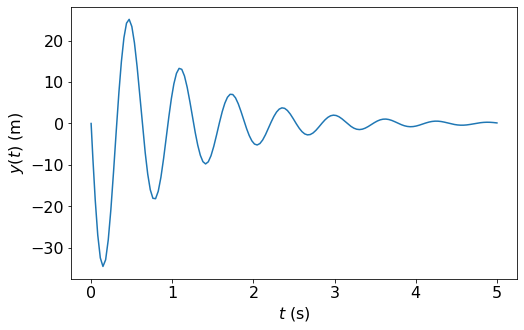

In [35]:
#plotting time against velocity
mf=16
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(ode.t,ode.y[0])

ax.yaxis.set_tick_params(labelsize=mf)
ax.set_ylabel('$y(t)$ (m)',fontsize=mf)
ax.xaxis.set_tick_params(labelsize=mf)
ax.set_xlabel('$t$ (s)',fontsize=mf)
plt.show()

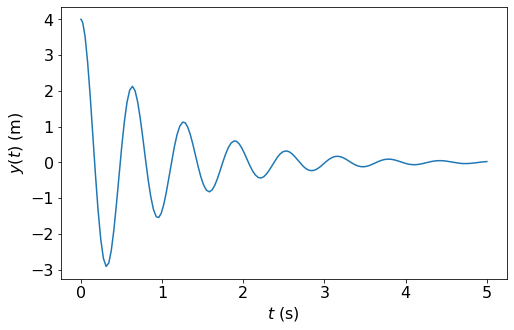

In [36]:
#plotting time against velocity
mf=16
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(ode.t,ode.y[1])

ax.yaxis.set_tick_params(labelsize=mf)
ax.set_ylabel('$y(t)$ (m)',fontsize=mf)
ax.xaxis.set_tick_params(labelsize=mf)
ax.set_xlabel('$t$ (s)',fontsize=mf)
plt.show()

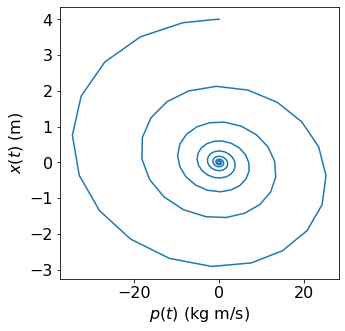

In [38]:
#plotting position vs time - snail
mf=16
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(ode.y[0]*m,ode.y[1])

ax.yaxis.set_tick_params(labelsize=mf)
ax.set_ylabel('$x(t)$ (m)',fontsize=mf)
ax.xaxis.set_tick_params(labelsize=mf)
ax.set_xlabel('$p(t)$ (kg m/s)',fontsize=mf)
plt.show()


# Task 2 (optional): The Kepler problem in 2D

Perform an ODE integration using scipy ODE integration for a planet evolving around a star at fixed position $(x_S,y_S) = (0,0)$. 
The force on the planet at position $\vec{r}=(x,y)$ is given by:

\begin{align}
 \vec{F}(x,y) = \vec{F}(\vec{r}) = G \frac{M m}{|\vec{r}|^3} \vec{r} 
\end{align}

where $M$ is the mass of the star, $m$ is the mass of the planet and $G$ is the gravitational constant. Use $G M m = -1$ and chose as initial conditions $\vec{r} = (5,0)$, $\vec{v} = \dot{\vec{r}} = (0,0.3)$

Plot the orbit for the interval $t=[0,37]$. (How would you detect when an orbit is completed? Check the `event` option of `solve_ivp`.)

Show numerically that Keplers second law is fulfilled: the connecting line between the star and the planet sweeps ower equal areas in equal times. You may calulare an infenitesimal area $dA(t)$ by  using the relation $dA = \frac{1}{2} \left|\vec{r}\times \vec{v}\right| dt $ and prove that $ \left|\vec{r}\times \vec{v}\right| = {\rm const}$ (within numerical accuracy). Check also if the energy $E=\frac12 v^2-\frac1{r} $ is conserved (within numerical accuracy). 

(Hint: when plotting constant data that changes on some microscopic scale, matplotlib will, if optons like y-limits are not set explicitly, adjust to the scale and only show a tiny indicator of the scale in the top left of the image such that one may mistakenly assume that the tiny changes of the data are huge) 

In [47]:
#defining boundaries
    #boundaries for planet
x0 = 5.0
y0 = 0.0
r0 = [x0, y0]
    #boundaries for star
xs = 0.0
ys = 0.0
rs = [xs, ys]

    #boundaries for time
t0 = 0.0
tf = 27.0

    #others
GMm = -1
r = [r0[i]-rs[i] for i in range(len(r0))]
#print(r)
v = [0, 0.3]

#define the derivative in vector form
def deriv(t, r, m):
    
    dA = 1/2 * abs(r*v)
    v, x = u
    dydt = [-omega2*x-2*sqrt(omega2)*zeta*v, v]
    return dydt

#### playground

dA = 1/2 * abs(cross(r, v)) #soll constant sein
E = 1/2 *v**2 -1/r

####

ode = solve_ivp(deriv, ts, y0, method='DOP853', args=(omega2,), rtol=1e-10, atol = 1e-10)

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'